In [2]:
%load_ext autoreload
%autoreload 2

import timeseries as ts
from elasticsearch import Elasticsearch
import json
import frame.frame_collection_stats as fcs
from lib import ESQuery

client = Elasticsearch("http://localhost:9200/", api_key="WGRuTF9wUUIzYVpjeXh5Wnl2RlA6Q3ZPUFJoZXRUX1NiX3NWQ0FGbHZEdw==")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


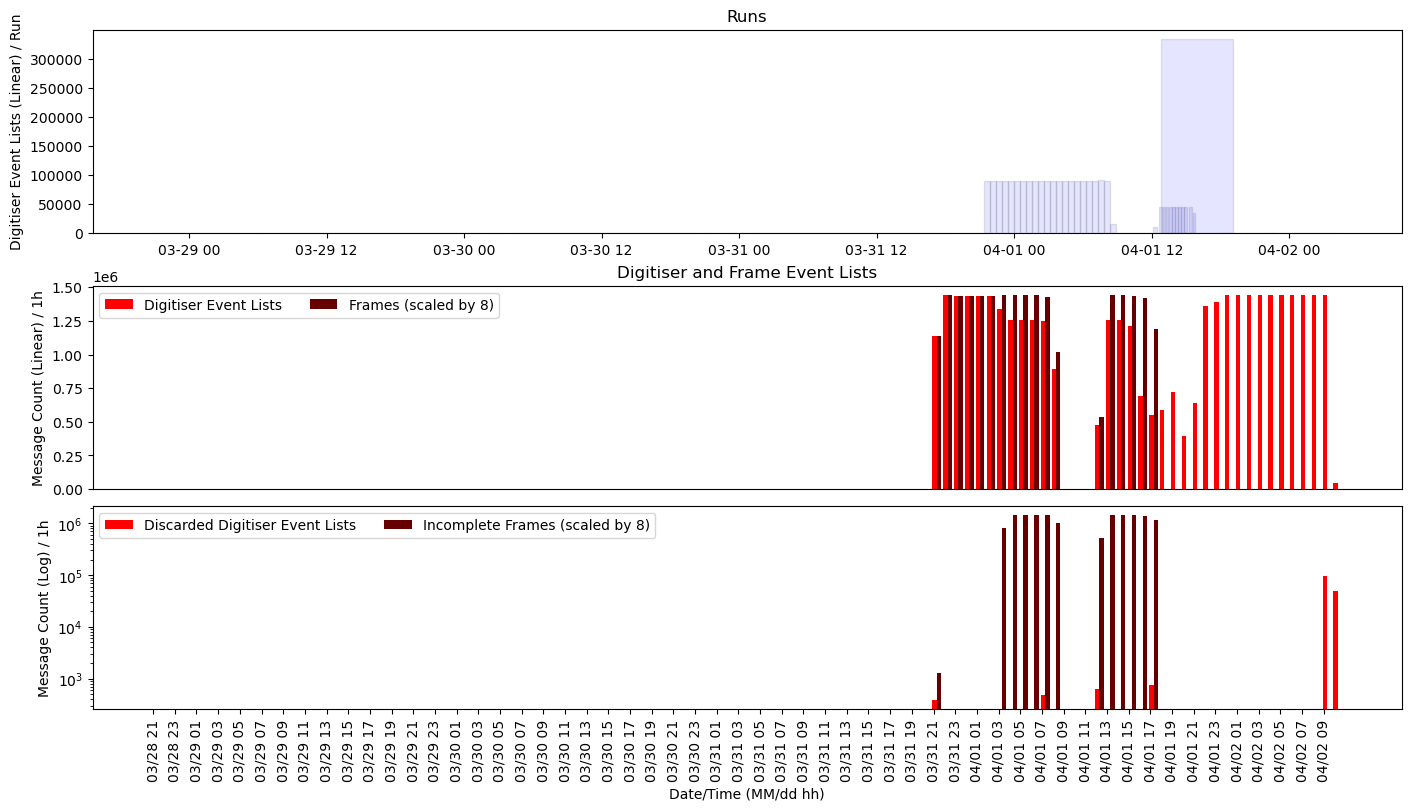

In [21]:

#Coarse Analysis
format = "MM/dd hh"
bin_width = "1h"

## HiFi
result = ts.do_counting(client, "jaeger-span*", ESQuery("hifi_1"), bin_width, format)
processed_result = ts.process_counts(result)

frame_result = ts.get_frame_children_by_run(client, "jaeger-span*" , ESQuery("hifi_1"))
run_result = ts.get_runs(client, f"jaeger-span*" , ESQuery("hifi_1"))

processed_runs = ts.process_runs(frame_result, run_result)

ts.hist_count_results(processed_result, processed_runs, format, bin_width, 8)


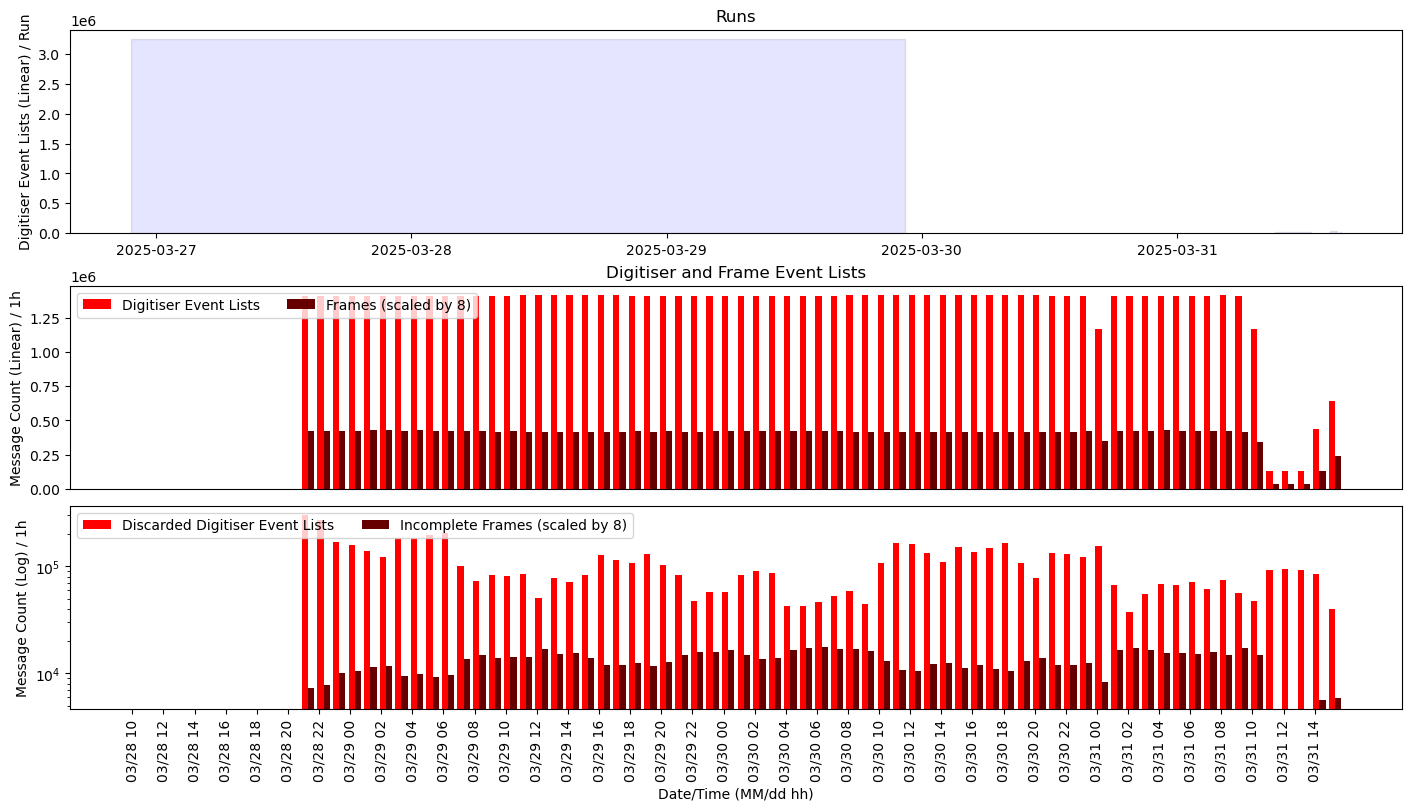

In [22]:

#Coarse Analysis
format = "MM/dd hh"
bin_width = "1h"

## MuSR
result = ts.do_counting(client, "jaeger-span*", ESQuery("pipeline-musr"), bin_width, format)
processed_result = ts.process_counts(result)

frame_result = ts.get_frame_children_by_run(client, "jaeger-span*" , ESQuery("pipeline-musr"))
run_result = ts.get_runs(client, f"jaeger-span*" , ESQuery("pipeline-musr"))

processed_runs = ts.process_runs(frame_result, run_result)

ts.hist_count_results(processed_result, processed_runs, format, bin_width, 8)

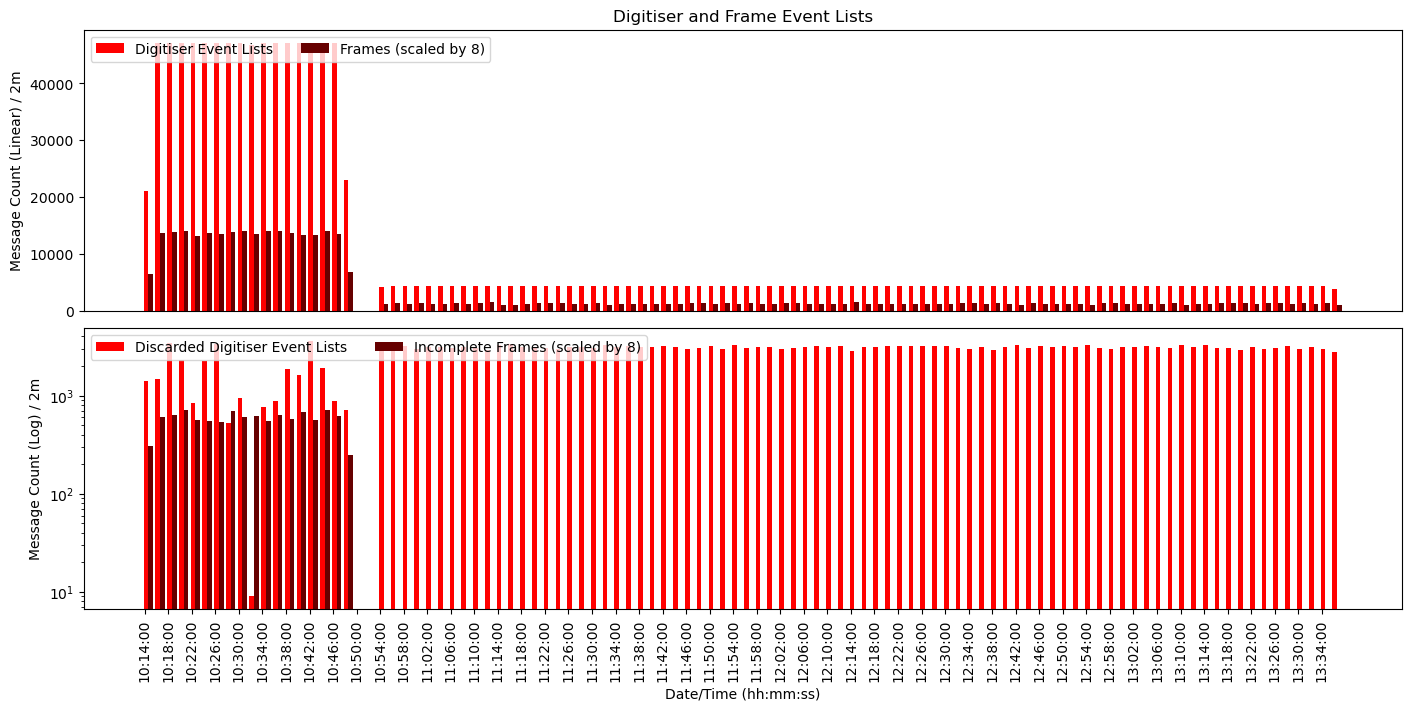

In [20]:
#Fine Grain Analysis
format = "hh:mm:ss"
bin_width = "2m"
index_datetime = "2025-03-31"
time_from = "10:15:06.0"
time_to = "20:00:00.0"
namespace = "pipeline-musr"
index = f"jaeger-span-{index_datetime}*"
result = ts.do_counting(client, index, ESQuery(namespace).add_range(f"{index_datetime}T{time_from}Z", f"{index_datetime}T{time_to}Z"), bin_width, format)

processed_result = ts.process_counts(result)

#frame_result = ts.get_frame_children_by_run(client, "jaeger-span*" , "hifi_1", time_from, time_to)
#run_result = ts.get_runs(client, f"jaeger-span*" , "hifi_1", time_from, time_to)

#processed_runs = ts.process_runs(frame_result, run_result)

ts.hist_count_results(processed_result, None, format, bin_width, 7)